X.shape: (26, 2)


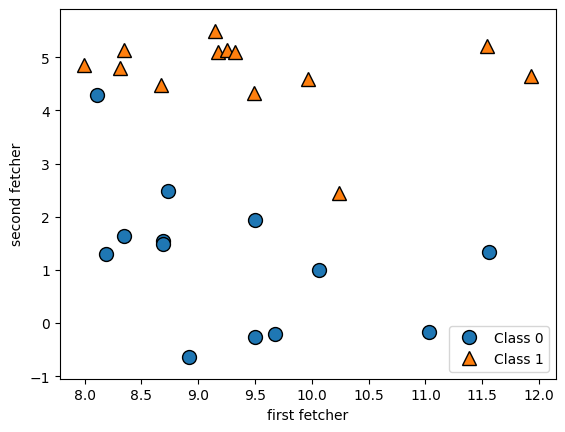

In [30]:
import matplotlib.pyplot as plt
import mglearn
X,y=mglearn.datasets.make_forge()
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.legend(["Class 0","Class 1"],loc=4)
plt.xlabel("first fetcher")
plt.ylabel("second fetcher")
print("X.shape: {}".format(X.shape))


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>


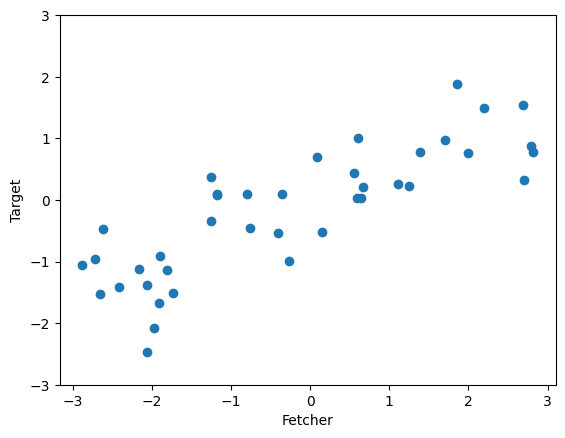

In [32]:
#ILUSTRAREA ALGORITMILOR DE REGRESIE
#Se foloseste datastul wave sintetic
X,y=mglearn.datasets.make_wave(n_samples=40)
plt.plot(X,y,'o')
plt.ylim(-3,3)
plt.xlabel("Fetcher")
plt.ylabel("Target")
print(plt)

In [51]:
import sklearn as sk
import numpy as np
from sklearn.datasets import load_breast_cancer
cancer=load_breast_cancer()
print("cancer.keys:\n{}".format(cancer.keys()))

cancer.keys:
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [49]:
print("Shape of cancer data:{}".format(cancer.data.shape))

Shape of cancer data:(569, 30)


In [52]:
print("saple counts per class:\n{}".format({n:v for n, v in zip(cancer.target_names,np.bincount(cancer.target))}))

saple counts per class:
{'malignant': 212, 'benign': 357}


In [55]:
#Descriere semantica a a fiecearei caracteristice(feature names)
print("Feature names:\n{}".format(cancer.feature_names))

Feature names:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [60]:
#Boston data set housing
#Prezice valoarea medie a caselor cu 506 puncte de date descrise prin 13 caracteristici
import pandas as pd
import numpy as np
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
boston= np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]
print("Data shape:{}".format(boston.data.shape))

Data shape:(506, 13)


In [63]:
X,y=mglearn.datasets.load_extended_boston()
print("X.shape:{}".format(X.shape))

X.shape:(506, 104)


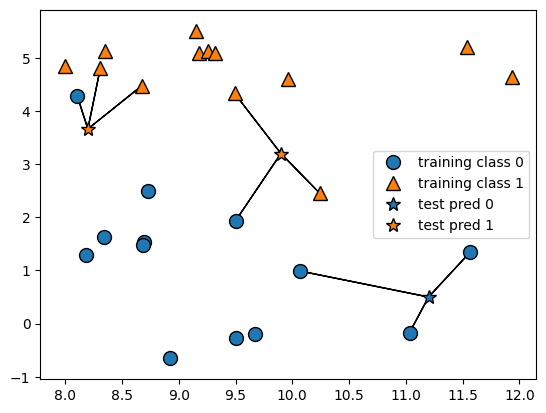

In [77]:
#KNEARESTNEIGHBOURS
#Pentru n_neighbours = 1 algoritmul este un unu cel mai apropiat algoritm
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [141]:
from sklearn.model_selection import train_test_split
X,y=mglearn.datasets.make_forge()
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)
from sklearn.neighbors import KNeighborsClassifier
klfu=KNeighborsClassifier(n_neighbors=3)
klfu.fit(X_train,y_train)
#Predictie pe setul de date cu metoda prdict
print("test set prediction:{}".format(klfu.predict(X_test)))

test set prediction:[1 0 1 0 1 0 0]


In [142]:
#Evaluare acuratesta model
print("Test set accuracy: {:.2f}".format(klfu.score(X_test,y_test)))

Test set accuracy: 0.86


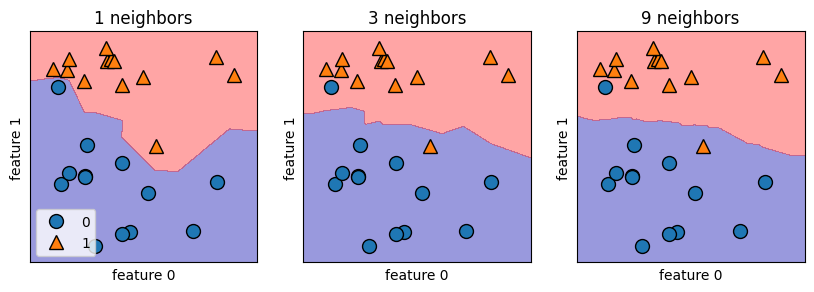

In [133]:
#Analiza kset calssifier
fig, axes = plt.subplots(1,3,figsize=(10,3))
for n_neighbors , ax in zip([1,3,9],axes):
  klfu=KNeighborsClassifier(n_neighbors=n_neighbors).fit(X,y)
  mglearn.plots.plot_2d_separator(klfu, X, fill=True, eps=0.5, ax=ax, alpha=.4)
  mglearn.discrete_scatter(X[:,0],X[:,1], y, ax=ax)
  ax.set_title("{} neighbors".format(n_neighbors))
  ax.set_xlabel("feature 0")
  ax.set_ylabel("feature 1")
axes[0].legend(loc=3)

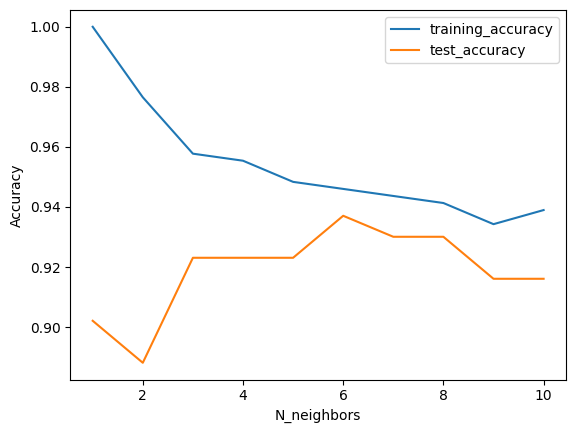

In [165]:
#Investigam daca putem confirma conexiunea intre generalizare si complexitate
from sklearn.datasets import load_breast_cancer
cancer=load_breast_cancer()
X_train,X_test,y_train,y_test=train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy=[]
test_accuracy=[]

#Antrenam n vecini de la 1 la 10
neighbors_settings=range(1,11)

for n_neighbors in neighbors_settings:
  #Construim modelul
  clf = KNeighborsClassifier(n_neighbors = n_neighbors)
  clf.fit(X_train, y_train)
  #Inregistram acuratetea multimi de antrenare
  training_accuracy.append(clf.score(X_train, y_train))
  #Inregistram acuratetea generalizari
  test_accuracy.append(clf.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label="training_accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test_accuracy")

plt.ylabel("Accuracy")
plt.xlabel("N_neighbors")
plt.legend()

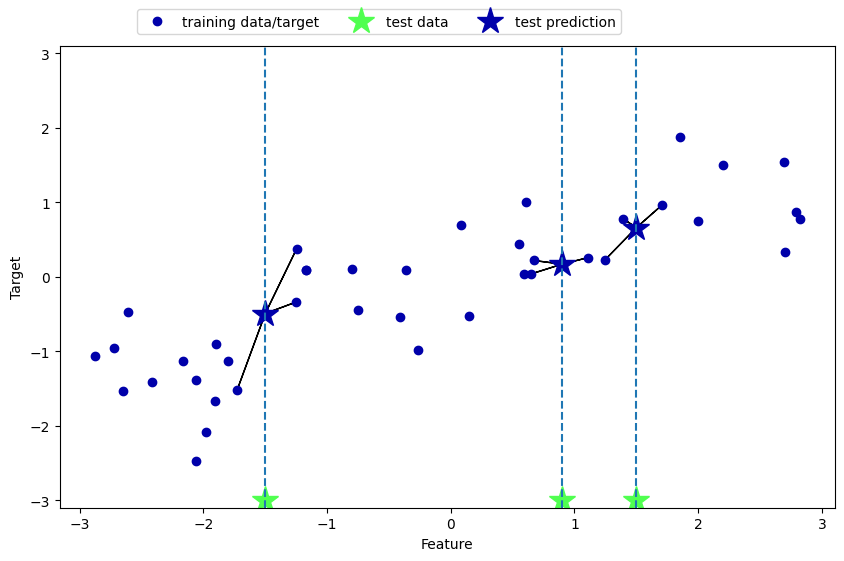

In [164]:
#REGRESIE KNEIGHBORS
#Cu cat punem mai multi neighbors atunci test predicionul este media normelor vectoriale a distantelor
mglearn.plots.plot_knn_regression(n_neighbors = 3)

In [176]:
#Algoritmul pentru cei mai apropiati k veci in cazul regresiei este implementat in calasa KNeighborsRegressor
#Se foloseste similar cu KNeigborsClassifier
from sklearn.neighbors import KNeighborsRegressor
X,y=mglearn.datasets.make_wave(n_samples=40)
#Impartim in datasetul in training si test
X_train,X_test,y_train,y_test = train_test_split(X, y, random_state=0)
#Initializam modelul si multimea cu numarul de vecini la 3
reg=KNeighborsRegressor(n_neighbors=3)
#Realizam model folosind datele de antrenare si tintele de antrenare
reg.fit(X_train,y_train)
#Putem face predictii pe acest set de date
print("Test set prediction: \n{}".format(reg.predict(X_test)))

Test set prediction: 
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [177]:
#Evaluam modelul folosind metoda score
print("Test set R^2: {:.2f}".format(reg.score(X_test,y_test)))

Test set R^2: 0.83


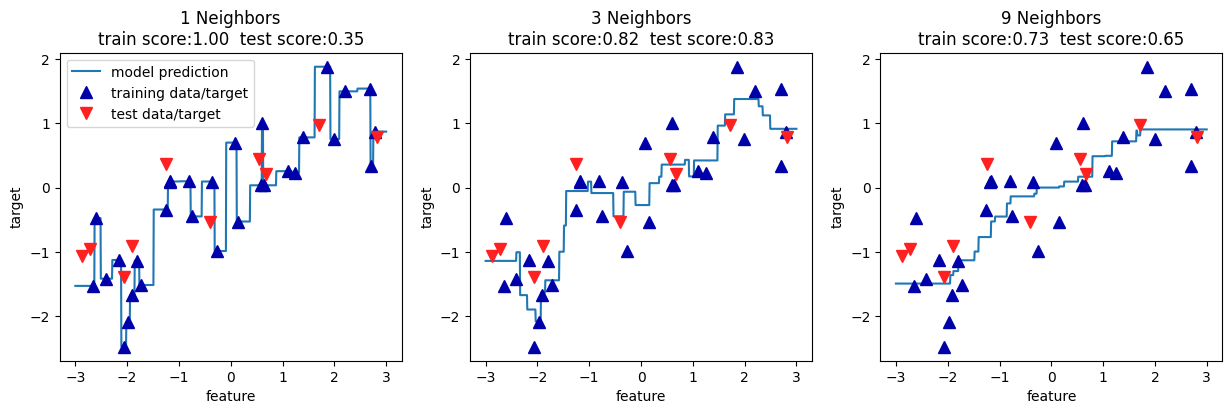

In [188]:
#Analiza KNeighborsRegressor
fig,axes=plt.subplots(1, 3, figsize=(15, 4))
#Creeem 1000 de puncte de date spatiate intre -3 si 3
line=np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1,3,9],axes):
  #Facem prezicea intre 1,3,9 vecini
  reg = KNeighborsRegressor(n_neighbors=n_neighbors)
  reg.fit(X_train,y_train)
  ax.plot(line, reg.predict(line))
  ax.plot(X_train,y_train,'^', c=mglearn.cm2(0),markersize=8)
  ax.plot(X_test,y_test,'v',c=mglearn.cm2(1),markersize=8)
  ax.set_title("{} Neighbors\ntrain score:{:.2f}  test score:{:.2f}".format(n_neighbors,reg.score(X_train,y_train),reg.score(X_test,y_test)))
  ax.set_xlabel("feature")
  ax.set_ylabel("target")

axes[0].legend(["model prediction","training data/target","test data/target"], loc="best")